In [1]:
import cdms
import collections
from typing import List, Tuple
from time import sleep,time
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import clear_output
from SettingResult import Setting
import math
import Afunctions as af
from pprint import pprint
import ROOT

import rawio

Welcome to JupyROOT 6.24/06


In [2]:
def low_pass_filter(data, alpha):
    """
    Applies a simple low-pass filter to a data series.

    :param data: a list or array of numeric data
    :param alpha: a smoothing factor between 0 and 1
    :return: a list containing the filtered data
    """
    filtered = [data[0]]  # initialize the filtered data with the first value of the input
    for i in range(1, len(data)):
        filtered.append(alpha * data[i] + (1 - alpha) * filtered[-1])
    return filtered

In [3]:
chanNames=["PAS1","PBS1","PCS1","PDS1","PES1","PFS1","PAS2","PBS2","PCS2","PDS2","PES2","PFS2"]

In [4]:
## template and noise psd
filepath = "/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Processed/Tests/Test/Noise/Test_Filter_23231120_193732.root"
noisefile = ROOT.TFile.Open(filepath,"READ")

template = []
for chan in chanNames:
    hist = noisefile.Get("zip2/"+chan+"TemplateTime")
    template.append(np.array([hist.GetBinContent(i) for i in range(1, hist.GetNbinsX() + 1)]))

noisefft = []
for chan in chanNames:
    hist = noisefile.Get("zip2/"+chan+"NoisePSD")
    noisefft.append(np.array([hist.GetBinContent(i) for i in range(1, hist.GetNbinsX() + 1)]))

hist = noisefile.Get("zip2/PTTemplateTime")
pttemplate = np.array([hist.GetBinContent(i) for i in range(1, hist.GetNbinsX() + 1)])
hist = noisefile.Get("zip2/PTNoisePSD")
ptnoisepsd = np.array([hist.GetBinContent(i) for i in range(1, hist.GetNbinsX() + 1)])


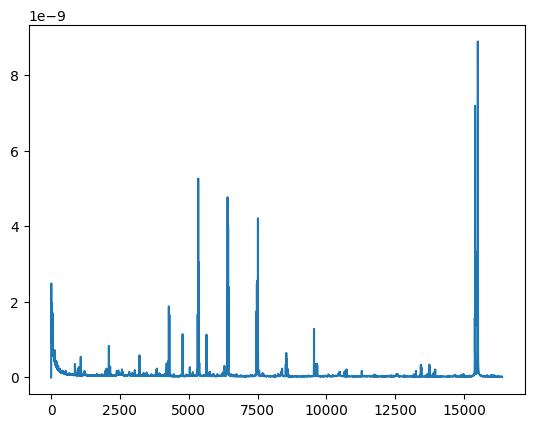

In [5]:
#plt.plot(template[0])
plt.plot(ptnoisepsd)
#template[0]

In [20]:
height = []

for filename in range(1,5):

    filepath = "/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R36/Raw/23231120_193732/23231120_193732_F000"+str(filename)+".mid.gz"

    myreader = rawio.RawDataReader(filepath)

    events = myreader.read_events(nb_events=1000, output_format=2,
                                  skip_empty=True,
                                  trigger_types=[2],
                                  detector_nums=[2],
                                  channel_names=chanNames)


    for id in range(len(events)):
        traces = events[id]["Z2"]

        pt = np.zeros(32768)
        ctr = 0
        for chan in chanNames:
            pt += traces[chan]
            ctr += 1
            #plt.plot(low_pass_filter(traces[chan], 0.01))
        pt /= ctr

        baseline = np.median(pt)
        OFTraces = af.ofAmp(pt,pttemplate,ptnoisepsd)
        OFTraces = np.roll(OFTraces,np.argmax(template[0])) #Align the traces so the peaks match up
        OFTraces += baseline

        minPeakHeight = baseline + 30
        minPeakWidth = 50

        peaks = af.getPeaks(OFTraces,height=minPeakHeight,width=minPeakWidth)
        xloc = peaks[1]

        height += list(peaks[2]-baseline)
#print ("OF height: ", height)




INFO: Found 1 midas raw data files
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<buil

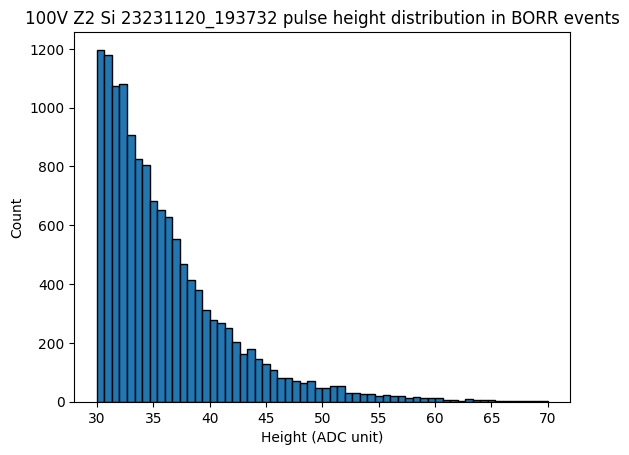

In [36]:
plt.hist(height, bins=60, range=(30,70), edgecolor='black')

# Add labels and title
plt.xlabel('Height (ADC unit)')
plt.ylabel('Count')
plt.title('100V Z2 Si 23231120_193732 pulse height distribution in BORR events')

#plt.yscale('log')
# Show the plot
plt.show()

<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in functi

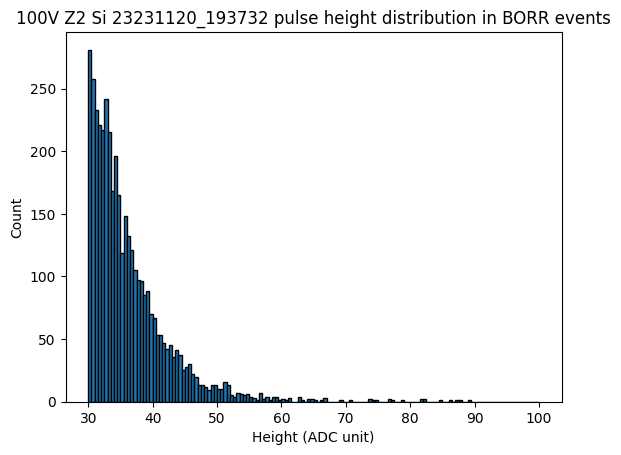

In [15]:
# full block to loop through events for PT

height = []

for id in range(591):
    traces = events[id]["Z2"]

    pt = np.zeros(32768)
    ctr = 0
    for chan in chanNames:
        pt += traces[chan]
        ctr += 1
        #plt.plot(low_pass_filter(traces[chan], 0.01))
    pt /= ctr

    baseline = np.median(pt)
    OFTraces = af.ofAmp(pt,pttemplate,ptnoisepsd)
    OFTraces = np.roll(OFTraces,np.argmax(template[0])) #Align the traces so the peaks match up
    OFTraces += baseline

    minPeakHeight = baseline + 30
    minPeakWidth = 50

    peaks = af.getPeaks(OFTraces,height=minPeakHeight,width=minPeakWidth)
    xloc = peaks[1]

    #plt.figure(figsize=(20,6))
    #plt.plot(pt, label="raw trace")
    #plt.plot(low_pass_filter(pt, 0.01), label="low pass filter")
    #plt.plot(OFTraces, label="optimal filter")
    #plt.plot(xloc, OFTraces[xloc], ".", color='red', label="peaks")

    #plt.legend()

    height += list(peaks[2]-baseline)
print ("OF height: ", height)

plt.hist(height, bins=140, range=(30,100), edgecolor='black')

# Add labels and title
plt.xlabel('Height (ADC unit)')
plt.ylabel('Count')
plt.title('100V Z2 Si 23231120_193732 pulse height distribution in BORR events')

# Show the plot
plt.show()

In [19]:
id = 4
traces = events[id]["Z2"]

In [20]:
#plt.figure(figsize=(20,6))

pt = np.zeros(32768)

ctr = 0
for chan in chanNames:
    pt += traces[chan]
    ctr += 1
    #plt.plot(low_pass_filter(traces[chan], 0.01))
pt /= ctr

#traces.append(pt) # last one is pt

In [21]:
#plt.figure(figsize=(20,6))
#plt.plot(low_pass_filter(pt, 1))

In [22]:
#calculating PT

baseline = np.median(pt)
OFTraces = af.ofAmp(pt,template[0],noisefft[0])
#OFTraces = np.roll(OFTraces,np.argmax(template[0]),axis=1) #Align the traces so the peaks match up
OFTraces = np.roll(OFTraces,np.argmax(template[0])) #Align the traces so the peaks match up
OFTraces += baseline

#baseline

<built-in function len>


OF height:  [43.33910859 30.60942263 47.03799138 33.42194572 37.57259178 31.55996641
 32.07112146 43.90561084 30.79427162 35.61655062 45.75987251 32.99434248]


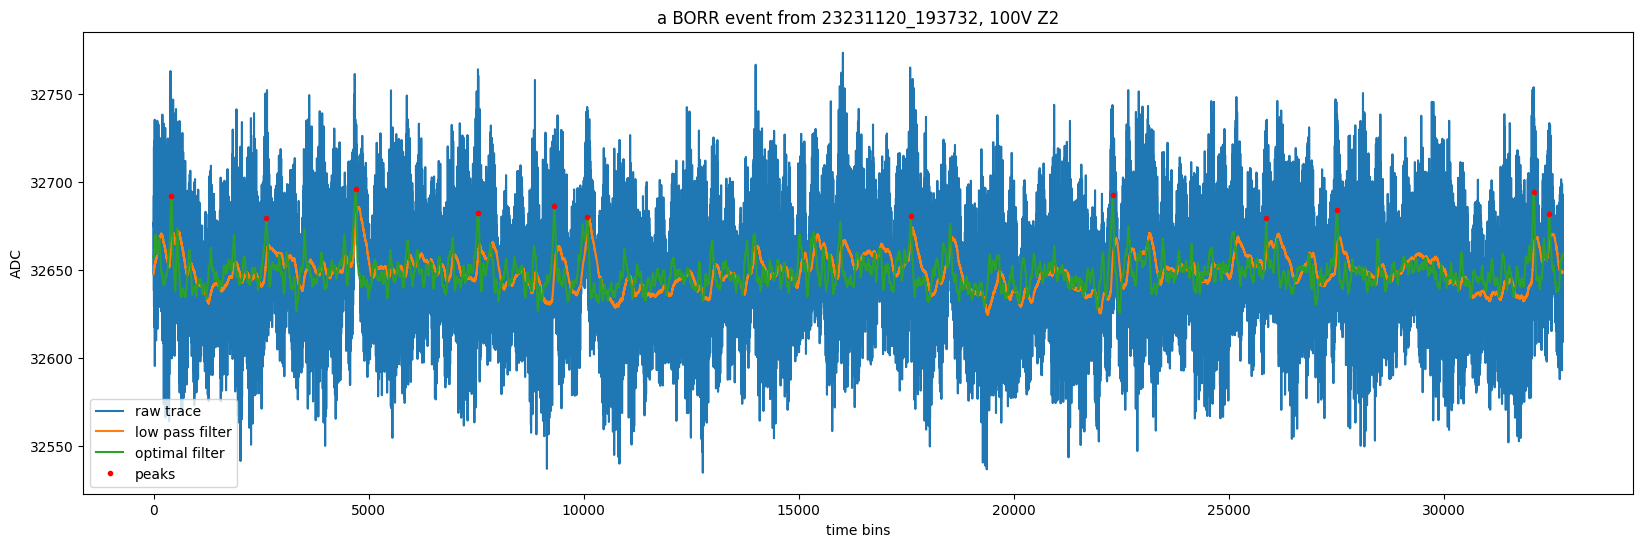

In [23]:
minPeakHeight = baseline + 30
minPeakWidth = 50

peaks = af.getPeaks(OFTraces,height=minPeakHeight,width=minPeakWidth)
xloc = peaks[1]

plt.figure(figsize=(20,6))
plt.plot(pt, label="raw trace")
plt.plot(low_pass_filter(pt, 0.01), label="low pass filter")
plt.plot(OFTraces, label="optimal filter")
plt.plot(xloc, OFTraces[xloc], ".", color='red', label="peaks")

plt.xlabel("time bins")
plt.ylabel("ADC")
plt.title("a BORR event from 23231120_193732, 100V Z2")
plt.legend()

height = peaks[2]-baseline
print ("OF height: ", height)

np.argmax(template[0])

# calculate for each individual channels

chanNum = 0

OFtraces = []
xlocs = []
for chanNum in range(len(chanNames)):
    baseline = np.median(traces[chanNames[chanNum]])
    OFtrace = af.ofAmp(traces[chanNames[chanNum]],template[chanNum],noisefft[chanNum])
    #OFTraces = np.roll(OFTraces,np.argmax(template[0]),axis=1) #Align the traces so the peaks match up
    OFtrace = np.roll(OFTraces,np.argmax(template[chanNum])) #Align the traces so the peaks match up
    OFtrace += baseline

    minPeakHeight = baseline + 30
    minPeakWidth = 50
    peaks = af.getPeaks(OFtrace,height=minPeakHeight,width=minPeakWidth)
    xloc = peaks[1]

    OFtraces.append(OFtrace)
    xlocs.append(xloc)

plt.figure(figsize=(20,6))
plt.plot(traces[chanNames[0]])
plt.plot(low_pass_filter(traces[chanNames[0]], 0.01))
plt.plot(OFTraces[0])
plt.plot(xlocs[0], OFTraces[xlocs[0]], ".", color='red')